<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/Text_Analytics68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: เฟิร์สมินอย

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายวรพล พลตรี 663020038-5
2. นายวิศรุต แสนบึง 663020296-3
3. นางสาวพัชรี ดียา
4. นางสาวศิริวรรณ นวลวัน 663020585-6
5. นายเสฎฐวุฒิ นาคสังข์ 663020586-4

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [1]:
# หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip install nltk
!pip install wordcloud
!pip install Pillow
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# เปลี่ยน path ตรงนี้
file_path = data = '/content/drive/MyDrive/ProjectBigData/thailand_tweets.txt'

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [4]:
with open(file_path, 'r', encoding='utf-8') as f:
    raw_text = f.read()

# parse รอบแรก
outer = json.loads(raw_text)

# ถ้ายังเป็น str → parse อีกรอบ
if isinstance(outer, str):
    outer = json.loads(outer)

# แปลงเป็น DataFrame
df = pd.DataFrame.from_dict(outer, orient='index')

# เลือกทุก row แต่เฉพาะ column ที่ต้องการ
display(df[['tweet_id', 'username', 'name', 'profile_picture', 'replies',
            'retweets', 'likes', 'is_retweet', 'posted_time', 'content',
            'hashtags', 'mentions', 'images', 'videos', 'tweet_url']].head())


,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url
1564764893038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30T23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...
1564764866598080513,1564764866598080513,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30T23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...
1564764845685280772,1564764845685280772,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30T23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...
1564764710804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30T23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...
1564764468277612549,1564764468277612549,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30T23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1564764893038882816 to 1564761905410875392
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         29 non-null     object
 1   username         29 non-null     object
 2   name             29 non-null     object
 3   profile_picture  29 non-null     object
 4   replies          29 non-null     int64 
 5   retweets         29 non-null     int64 
 6   likes            29 non-null     int64 
 7   is_retweet       29 non-null     bool  
 8   posted_time      29 non-null     object
 9   content          29 non-null     object
 10  hashtags         29 non-null     object
 11  mentions         29 non-null     object
 12  images           29 non-null     object
 13  videos           29 non-null     object
 14  tweet_url        29 non-null     object
 15  link             29 non-null     object
dtypes: bool(1), int64(3), object(12)
memory usage: 3.7+ 

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

Total number of tweets: 29

Content of the first tweet:
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 

First tweet contains hashtags: False
First tweet contains mentions: False
All Thailand-related hashtags: ['thailand', 'Thailand']
Most popular tweet:
Username: OhmPawatInter
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Replies: 0
Retweets: 99
Likes: 143
Top 5 most popular tweets:


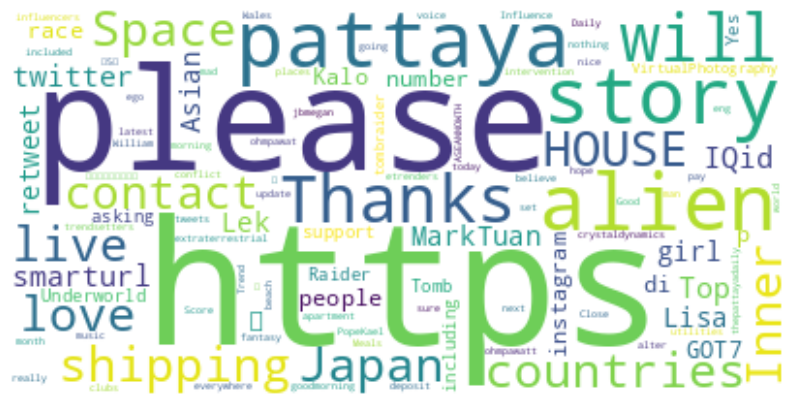

In [9]:
# 1 The total number of tweets collected in the file
total_tweets = len(df)
print("Total number of tweets:", total_tweets)

# 2 The content of the first tweet
first_tweet_content = df.iloc[0]["content"]
print("\nContent of the first tweet:")
print(first_tweet_content)

# 3 Is the first tweet contained any hashtags or mentions?
first_tweet_hashtags = df.iloc[0]["hashtags"]
first_tweet_mentions = df.iloc[0]["mentions"]

print("\nFirst tweet contains hashtags:", bool(first_tweet_hashtags))
print("First tweet contains mentions:", bool(first_tweet_mentions))

# 4 Collect all hashtags from the 'hashtags' column
all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]

# Filter for hashtags that contain "Thailand" (case-insensitive)
thailand_hashtags = [hashtag for hashtag in all_hashtags if 'thailand' in hashtag.lower()]

print("All Thailand-related hashtags:", thailand_hashtags)

# 5 Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
import numpy as np
# สร้าง score ของความนิยม
popularity_score = df['retweets'] + df['replies'] + df['likes']
# หา index ของ tweet ที่มี score สูงสุด
most_popular_index = np.argmax(popularity_score)
# แสดง tweet ที่ most popular
most_popular_tweet = df.iloc[most_popular_index]

print("Most popular tweet:")
print("Username:", most_popular_tweet['username'])
print("Content:", most_popular_tweet['content'])
print("Replies:", most_popular_tweet['replies'])
print("Retweets:", most_popular_tweet['retweets'])
print("Likes:", most_popular_tweet['likes'])

# 6 Display the top 5 tweets that are the most popular among your collection
# Calculate popularity score (sum of replies, retweets, and likes)
df['popularity'] = df['replies'] + df['retweets'] + df['likes']

# Find the indices of the top 5 most popular tweets
top_5_indices = df['popularity'].nlargest(5).index

# Display the top 5 most popular tweets
print("Top 5 most popular tweets:")
df.loc[top_5_indices, ['content', 'replies', 'retweets', 'likes', 'popularity']]

# 7 Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small
# Combine all the tweet content into a single string
all_content = " ".join(df['content'])

# Create a WordCloud object
# You can add more stopwords if needed
stopwords = set(STOPWORDS)
stopwords.update(["Thailand", "thailand"]) # Add "Thailand" to stopwords as it's in every tweet

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_content)

# Display the generated word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [14]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/ProjectBigData/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [15]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [17]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [18]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [19]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [22]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df.head()

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,0,0,0,0,0,0,0,0,0,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,14,3,1,1,63,96,86,86,49,27
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,1,0,0,0,0,0,0,0,0,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,0,0,0,0,0,1,0,0,2,1


### ทำการสำรวจข้อมูลเบื้องต้น

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

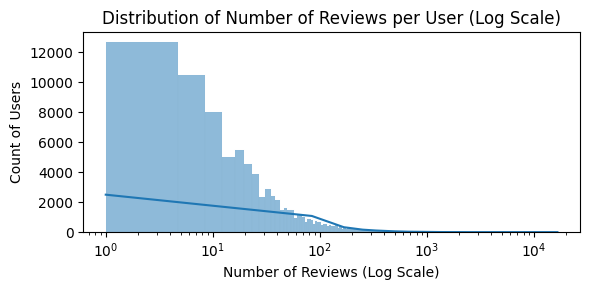

count    100000.000000
mean        121.443680
std         335.884257
min           1.000000
25%           9.000000
50%          27.000000
75%          96.000000
max       16567.000000
Name: review_count_user, dtype: float64

Median number of reviews per user: 27.0
Mode (most common) number of reviews per user: 2


In [27]:
# ----------------- Your code here -----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(6, 3))

# Histogram
sns.histplot(data=df, x='review_count_user', ax=ax, kde=True)
ax.set_xscale('log')
ax.set_title('Distribution of Number of Reviews per User (Log Scale)')
ax.set_xlabel('Number of Reviews (Log Scale)')
ax.set_ylabel('Count of Users')

plt.tight_layout()
plt.show()

# Print some statistics
print(df['review_count_user'].describe())
print(f"\nMedian number of reviews per user: {df['review_count_user'].median()}")
print(f"Mode (most common) number of reviews per user: {df['review_count_user'].mode().values[0]}")

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

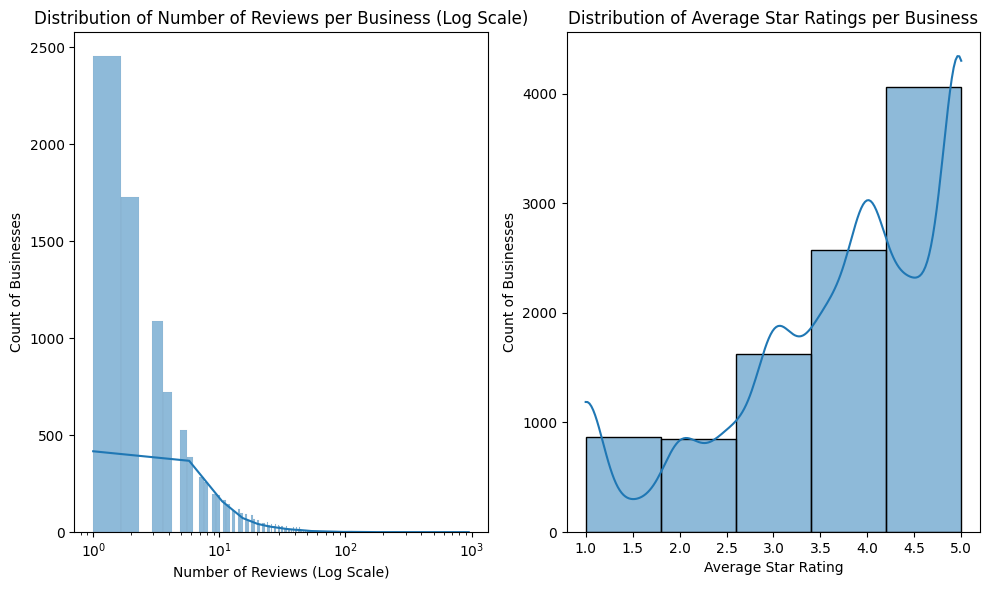

count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       950.000000
Name: review_count, dtype: float64

Median number of reviews per business: 3.0
Mode (most common) number of reviews per business: 1
count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
25%         3.000000
50%         4.000000
75%         4.750000
max         5.000000
Name: avg_stars, dtype: float64

Median average stars per business: 4.0
Mode (most common) average stars per business: 5.0


In [35]:
# ----------------- Your code here -----------------
# Group by business ID and count reviews and calculate average stars
business_stats = df.groupby('business_id').agg({'review_id': 'count', 'stars_review': 'mean'})
business_stats = business_stats.rename(columns={'review_id': 'review_count', 'stars_review': 'avg_stars'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Histogram of review count
sns.histplot(data=business_stats, x='review_count', ax=axes[0], kde=True)
axes[0].set_xscale('log')
axes[0].set_title('Distribution of Number of Reviews per Business (Log Scale)')
axes[0].set_xlabel('Number of Reviews (Log Scale)')
axes[0].set_ylabel('Count of Businesses')

# Histogram of average stars
sns.histplot(data=business_stats, x='avg_stars', ax=axes[1], kde=True, bins=5)
axes[1].set_title('Distribution of Average Star Ratings per Business')
axes[1].set_xlabel('Average Star Rating')
axes[1].set_ylabel('Count of Businesses')

plt.tight_layout()
plt.show()

# Print some statistics
print(business_stats['review_count'].describe())
print(f"\nMedian number of reviews per business: {business_stats['review_count'].median()}")
print(f"Mode (most common) number of reviews per business: {business_stats['review_count'].mode().values[0]}")

print(business_stats['avg_stars'].describe())
print(f"\nMedian average stars per business: {business_stats['avg_stars'].median()}")
print(f"Mode (most common) average stars per business: {business_stats['avg_stars'].mode().values[0]}")

มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [33]:
# ----------------- Your code here -----------------
from collections import Counter
# Assuming 'df' is your merged DataFrame with 'categories' column

# Create a list to store all categories
all_categories = []
for categories in df['categories'].dropna():  # Handle potential missing values
  for category in categories.split(', '):
    all_categories.append(category)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Count the number of unique categories
unique_categories_count = len(set(all_categories))
print(f"Total number of unique categories: {unique_categories_count}")
# Display the top 10 most frequent categories
print("Top 10 most frequent business categories:")
for category, count in category_counts.most_common():
  print(f"{category}: {count}")

# Alternatively, you can create a DataFrame for better visualization
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])

Total number of unique categories: 980
Top 10 most frequent business categories:
Restaurants: 72124
Food: 29650
Nightlife: 23298
Bars: 21927
American (New): 16538
American (Traditional): 14200
Breakfast & Brunch: 13984
Sandwiches: 10015
Event Planning & Services: 9954
Seafood: 7950
Coffee & Tea: 7824
Pizza: 7245
Burgers: 7194
Mexican: 6748
Italian: 6572
Shopping: 6200
Hotels & Travel: 6034
Arts & Entertainment: 5790
Cafes: 5412
Cocktail Bars: 5096
Beauty & Spas: 4887
Salad: 4632
Hotels: 4272
Cajun/Creole: 4129
Specialty Food: 3912
Venues & Event Spaces: 3809
Sushi Bars: 3642
Pubs: 3557
Beer: 3516
Wine & Spirits: 3516
Bakeries: 3475
Japanese: 3454
Desserts: 3336
Caterers: 3072
Chinese: 3030
Southern: 2984
Fast Food: 2887
Ice Cream & Frozen Yogurt: 2872
Sports Bars: 2861
Barbeque: 2739
Steakhouses: 2734
Active Life: 2529
Wine Bars: 2514
Vegetarian: 2511
Automotive: 2355
Asian Fusion: 2353
Diners: 2181
Juice Bars & Smoothies: 2110
Lounges: 2073
Thai: 2070
Music Venues: 2065
Local Services

### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

<ระบุปัญหา/คำถามที่ต้องการวิเคราะห์>

**คำถามสำหรับผู้บริหาร:** ธุรกิจประเภทใดที่ได้รับความนิยมมากที่สุดจากรีวิว?

Top 10 most popular business categories based on review count:
                    Category  Count
0                Restaurants  72124
1                       Food  29650
2                  Nightlife  23298
3                       Bars  21927
4             American (New)  16538
5     American (Traditional)  14200
6         Breakfast & Brunch  13984
7                 Sandwiches  10015
8  Event Planning & Services   9954
9                    Seafood   7950


/tmp/ipython-input-2335130157.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=top_10_categories_df, palette='viridis')


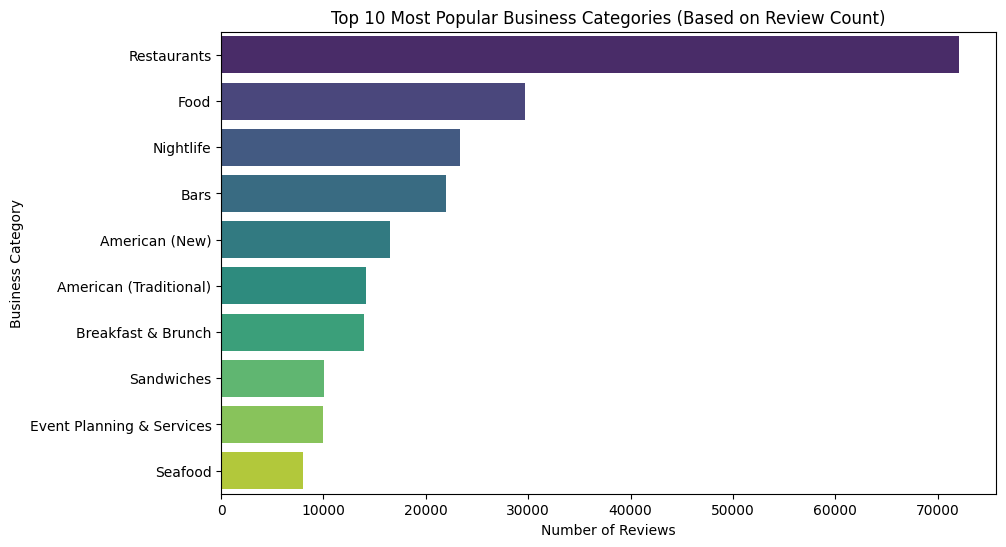

In [37]:
# ----------------- Your analysis code here -----------------
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your merged DataFrame with 'categories' column

# Create a list to store all categories
all_categories = []
for categories in df['categories'].dropna():  # Handle potential missing values
  for category in categories.split(', '):
    all_categories.append(category)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Get the top 10 most frequent categories for visualization
top_10_categories = category_counts.most_common(10)
top_10_categories_df = pd.DataFrame(top_10_categories, columns=['Category', 'Count'])

print("Top 10 most popular business categories based on review count:")
print(top_10_categories_df)

# Visualize the top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=top_10_categories_df, palette='viridis')
plt.title('Top 10 Most Popular Business Categories (Based on Review Count)')
plt.xlabel('Number of Reviews')
plt.ylabel('Business Category')
plt.show()

**คำถามเพิ่มเติมสำหรับผู้บริหาร:**
* การแจกแจงของจำนวนดาวที่ผู้ใช้ให้โดยรวมเป็นอย่างไร?

/tmp/ipython-input-3099134618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars_review', data=df, palette='viridis')


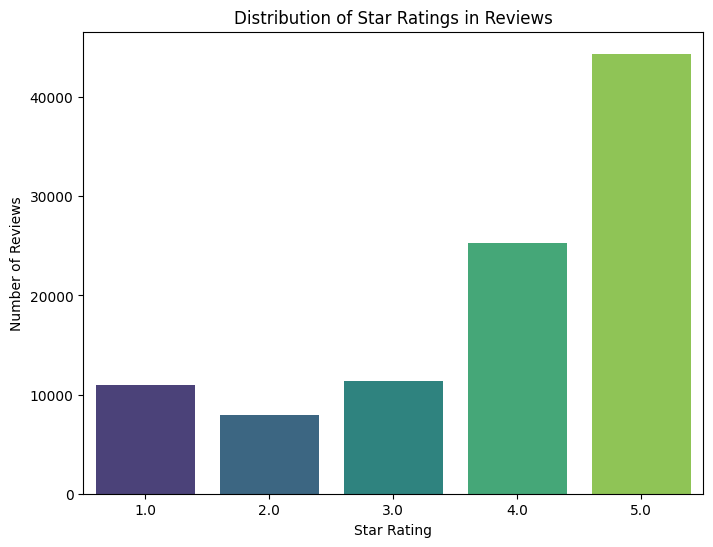


Distribution of Star Ratings:
stars_review
1.0    10921
2.0     7988
3.0    11362
4.0    25337
5.0    44392
Name: count, dtype: int64


In [39]:
# ----------------- Your analysis code here -----------------
import matplotlib.pyplot as plt
import seaborn as sns

# การแจกแจงของจำนวนดาวที่ผู้ใช้ให้โดยรวม
plt.figure(figsize=(8, 6))
sns.countplot(x='stars_review', data=df, palette='viridis')
plt.title('Distribution of Star Ratings in Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

print("\nDistribution of Star Ratings:")
print(df['stars_review'].value_counts().sort_index())

In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here


เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
#----------------------------------------------
# Your code starts here


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **